In [2]:
from pathlib import Path
import scipy
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_path = Path('..\\data\\2973_LickingLama_20250129_164958.mat')
data = scipy.io.loadmat(data_path)
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SessionData'])

In [4]:
data['SessionData']

array([[(array([[0]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
                1, 1, 1, 1, 0, 0, 0, 0]], dtype=uint8), array([[250]],

In [5]:
print("SessionData field names:")
print(data['SessionData'].dtype.names)

SessionData field names:
('byteLoss', 'Rewarded', 'cTrial', 'visualString', 'weirdBytes', 'date', 'Info', 'SettingsFile', 'nTrials', 'RawEvents', 'RawData', 'Punished', 'DidNotChoose', 'stimRate', 'targFrac', 'distFrac', 'ITIjitter', 'StimType', 'stimEvents', 'TrialSettings', 'Notes', 'MarkerCodes', 'stimDur', 'decisionGap', 'stimOn', 'optoSide', 'optoType', 'optoDur', 'optoPower1', 'optoPower2', 'audioFreq', 'audioAmp', 'Assisted', 'AutoReward', 'Settings', 'sessionDur', 'givenReward')


In [14]:
# Load Vc.mat file (MATLAB v7.3 format requires h5py)
import h5py

vc_path = Path('..\\data\\Vc.mat')
print(f"Loading variables from {vc_path}")

with h5py.File(vc_path, 'r') as f:
    # Load the specific variables
    Vc = f['Vc'][:]
    trialOn = f['trialOn'][:]
    U = f['U'][:]
    ledInfo = f['ledInfo'][:]  # Load as numpy array
    frameInfo = f['frameInfo'][:]  # Load as numpy array
    
    print(f"Vc shape: {Vc.shape}")
    print(f"trialOn shape: {trialOn.shape}")
    print(f"U shape: {U.shape}")
    print(f"ledInfo shape: {ledInfo.shape}")
    print(f"frameInfo shape: {frameInfo.shape}")  # Should be (39341, 2)

Loading variables from ..\data\Vc.mat
Vc shape: (39341, 500)
trialOn shape: (3, 1000000)
U shape: (500, 640, 540)
ledInfo shape: (3, 39341)
frameInfo shape: (2, 39341)


In [22]:
import numpy as np

trialOn_clean = trialOn[:, ~np.isnan(trialOn[0, :])]
trialOn_clean = trialOn_clean.T
print(trialOn_clean.shape)


(250, 3)


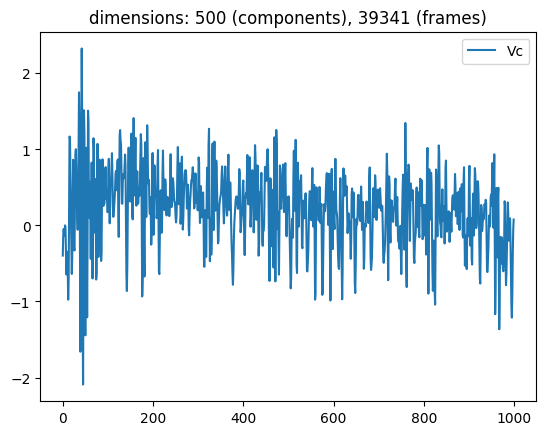

In [24]:
plt.title(f"dimensions: {Vc.T.shape[0]} (components), {Vc.T.shape[1]} (frames)")

plt.plot(Vc.T[0, :1000], label="Vc")
plt.legend()

In [19]:

print(U.T.shape)

(540, 640, 500)


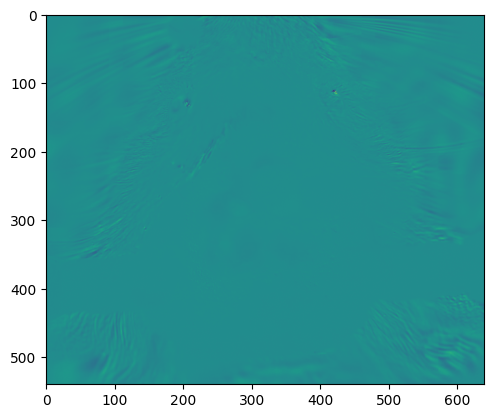

In [21]:
plt.imshow(U.T[:, :, 400])

In [25]:
# Calculate sampling rate from frameInfo
# sRate = 1 / mean(diff(frameInfo(:,2))); %sampling rate in Hz

# frameInfo is (2, 39341) - transposed from MATLAB (39341, 2)
# In MATLAB: frameInfo(:,2) means all rows, column 2 (timestamps)
# In Python with transposed data: frameInfo[1, :] means row 1, all columns (timestamps)
sRate = 1 / np.mean(np.diff(frameInfo[1, :]))  # sampling rate in Hz
print(f"Sampling rate: {sRate:.2f} Hz")

Sampling rate: 15.15 Hz


In [ ]:
data['SessionData'][0,0]['StimType'] # 2 is for audio

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2]], dtype=uint8)

In [28]:
data['SessionData'][0,0]['Rewarded']

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0]], dtype=uint8)

In [29]:
audIdx = (data['SessionData'][0,0]['StimType'] == 2) & (data['SessionData'][0,0]['Rewarded'] == 1)

In [30]:
audIdx

array([[False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True, False,  True, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True, False,  True,  True, False,  True, False, False, False,
         True,  True, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      